## Обробка та аналіз біомедичних даних
### БС-24
### Манзик Максим
## Лабораторна робота №4-5

In [61]:
from scipy.stats import shapiro, ttest_ind, ttest_rel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Оберемо набір даних що буде характерезувати продаж діамантів

In [62]:
data = pd.read_csv(r"C:\Users\kepkp\PycharmProjects\Study\python_deepdive\tasks\Analytics\LB_4-5\diamonds.csv",
                   encoding='utf-8')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [63]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## На основі зміної depth сторимо нову depth_multiplied



In [64]:
quantitative_variable = "depth"
multipliers = np.random.randint(1, 3, size=len(data))
new_variable = (data[quantitative_variable] * multipliers)
data.insert(data.columns.get_loc(quantitative_variable) + 1, f"{quantitative_variable}_multiplied", new_variable)


In [65]:
data = data[:4999]
data

,carat,cut,color,clarity,depth,depth_multiplied,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,123.0,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,124.8,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,126.6,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
4994,0.90,Good,D,SI2,63.6,127.2,57.0,3740,6.07,6.03,3.85
4995,0.70,Ideal,F,VVS2,61.9,61.9,54.8,3741,5.68,5.72,3.53
4996,0.58,Ideal,D,VVS1,62.2,62.2,56.0,3741,5.34,5.36,3.33
4997,0.90,Good,I,VVS1,63.9,63.9,63.0,3741,6.04,6.07,3.87


## Оберемо категоріальну зміну cut	- де I = Ideal, P = Premium , а числовою зміною буде depth

In [66]:
group_I = data[data['cut'] == 'Ideal']
group_P = data[data['cut'] == 'Premium']

## Використаємо тест Шапіро-Вілка для перевірки на нормальність

In [67]:
stat_I, p_I = shapiro(group_I['depth'])
print("Результат перевірки нормальності для групи I:")
print("Statistic:", stat_I)
print("p-value:", p_I)
if p_I < 0.05:
    print("Розподіл для групи I не є нормальним.")
else:
    print("Розподіл для групи I є нормальним.")

stat_P, p_P = shapiro(group_P['depth'])
print("\nРезультат перевірки нормальності для групи P:")
print("Statistic:", stat_P)
print("p-value:", p_P)
if p_P < 0.05:
    print("Розподіл для групи P не є нормальним.")
else:
    print("Розподіл для групи P є нормальним.")


Результат перевірки нормальності для групи I:
Statistic: 0.9693695306777954
p-value: 2.2205955642139836e-19
Розподіл для групи I не є нормальним.

Результат перевірки нормальності для групи P:
Statistic: 0.9475604891777039
p-value: 2.8089233804953203e-19
Розподіл для групи P не є нормальним.


## Тепер розраховуємо статистичні дані для обох груп


In [68]:
count_I = len(group_I)
mean_I = group_I['depth'].mean()
std_dev_I = group_I['depth'].std()

count_P = len(group_P)
mean_P = group_P['depth'].mean()
std_dev_P = group_P['depth'].std()

print("Характеристика для групи I:")
print("Кількість спостережень:", count_I)
print("Середнє значення:", mean_I)
print("Стандартне відхилення:", std_dev_I)

print("\nХарактеристика для групи P:")
print("Кількість спостережень:", count_P)
print("Середнє значення:", mean_P)
print("Стандартне відхилення:", std_dev_P)


Характеристика для групи I:
Кількість спостережень: 1845
Середнє значення: 61.66037940379403
Стандартне відхилення: 0.6917446797494603

Характеристика для групи P:
Кількість спостережень: 1094
Середнє значення: 61.234186471663634
Стандартне відхилення: 1.2329130130207566


Тепер зображуємо ящичкову діаграму для даних

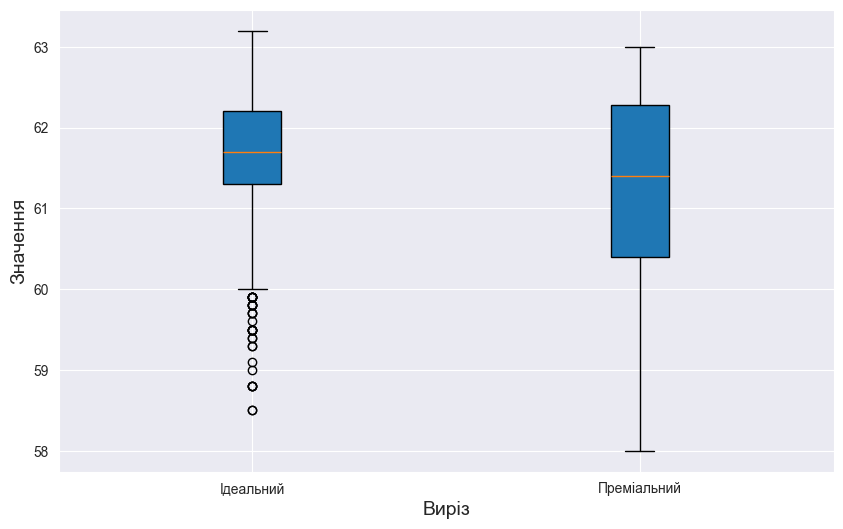

In [69]:
values_I = group_I['depth']
values_P = group_P['depth']
plt.figure(figsize=(10, 6))
plt.boxplot([values_I, values_P], labels=['Ідеальний', 'Преміальний'], patch_artist=True)
plt.xlabel('Виріз', fontsize=14)
plt.ylabel('Значення', fontsize=14)
plt.show()


#### На діаграмі можна побачити медіану - позначено помаранчевою лінією, викиди - маленькі кружечки , вони показують дані що відхиляються від основної маси даних,також можна по графіку приблизно зрозуміти чи є розподіл нормальним дивлячись на симетричність ящичку та довжину вус.

#### Тепер сформулюємо гіпотези та за допомогою критерію Стьюдента рівності середніх для незалежний виборок визначимо правильну гіпотезу

##### Нульова гіпотеза (H0):Значення глибини для ідеальних та преміальних вирізів.

##### Альтернативна гіпотеза (H1):Значення глибини для ідеальних та преміальних вирізів.

In [70]:
statistic, p_value = ttest_ind(group_I['depth'], group_P['depth'])
print("Statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("\nІснує різниця між групами. Відхиляємо нульову гіпотезу.")
else:
    print("\nНе ісує різниці між групами. Нульова гіпотеза не відхиляється.")

Statistic: 12.001139778719756
p-value: 1.984437815065124e-32

Існує різниця між групами. Відхиляємо нульову гіпотезу.


З даних бачимо що є  залежність між типом пухлини та її розміром

### Тепер для 4 завдання виконаємо те саме тільки у нас будуть залежні вибірки а саме depth та depth_multiplied

In [71]:
original_variable = data['depth']
generated_variable = data['depth_multiplied']

Тепер знову перевірим дані за допомогою тесту Шапіро-Вілка на нормальність

In [72]:
statistic_original, p_value_original = shapiro(original_variable)
print("Statistic:", statistic_original)
print("p-value:", p_value_original)
if p_value_original > 0.05:
    print("Розподіл є нормальним.")
else:
    print("Розподіл не є нормальним.")

statistic_generated, p_value_generated = shapiro(generated_variable)
print("Statistic:", statistic_generated)
print("p-value:", p_value_generated)
if p_value_generated > 0.05:
    print("Розподіл є нормальним.")
else:
    print("Розподіл не є нормальним.")


Statistic: 0.9541640877723694
p-value: 5.500174496773401e-37
Розподіл не є нормальним.
Statistic: 0.7055256962776184
p-value: 0.0
Розподіл не є нормальним.


Бачимо що обидва розподіла не мають нормального розподілу

### Тепер обраховуємо статистичні значення для даних

In [73]:
count_original = original_variable.count()
count_generated = generated_variable.count()
mean_original = original_variable.mean()
std_dev_original = original_variable.std()
mean_generated = generated_variable.mean()
std_dev_generated = generated_variable.std()

print("Статистичні характеристики для кількісної змінної з оригінального дата сету:")
print("Кількість спостережень:", count_original)
print("Середнє значення:", mean_original)
print("Стандартне відхилення:", std_dev_original)

print("\nСтатистичні характеристики для згенерованої кількісної змінної:")
print("Кількість спостережень:", count_generated)
print("Середнє значення:", mean_generated)
print("Стандартне відхилення:", std_dev_generated)


Статистичні характеристики для кількісної змінної з оригінального дата сету:
Кількість спостережень: 4999
Середнє значення: 61.85505101020205
Стандартне відхилення: 1.6449596801557826

Статистичні характеристики для згенерованої кількісної змінної:
Кількість спостережень: 4999
Середнє значення: 92.72710542108422
Стандартне відхилення: 31.07799382397676


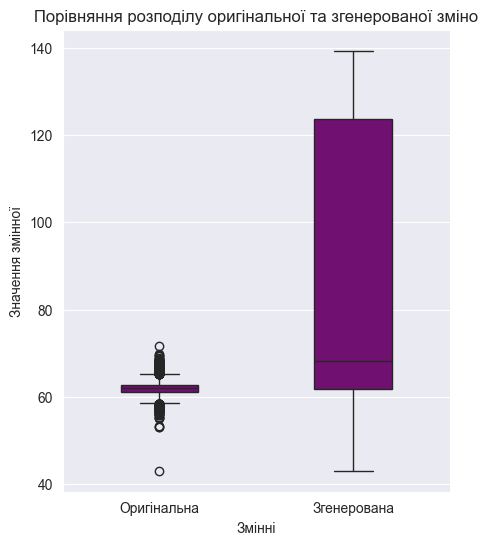

In [74]:
df = pd.DataFrame({
    'group': ['Оригінальна змінна'] * len(original_variable) + ['Згенерована змінна'] * len(generated_variable),
    'value': pd.concat([original_variable, generated_variable])
})

plt.figure(figsize=(5, 6))
sns.boxplot(x='group', y='value', data=df, color='purple', width=0.4)
plt.title('Порівняння розподілу оригінальної та згенерованої зміно')
plt.xlabel('Змінні')
plt.ylabel('Значення змінної')
plt.xticks([0, 1], ['Оригінальна', 'Згенерована'])
plt.show()

З діаграми видно до прикладу що у оригінальної вибірки доволі велика кількість викидів,також тут наочно видно що у вибірок не має нормального розподілу

### Сформуємо гіпотези та перевіримо їх за допомогою парного критерію Стьюдента рівності середніх

##### Нульова гіпотеза (H0): Середні значення оригінальної кількісної змінної та згенерованої змінної рівні.

##### Альтернативна гіпотеза (H1): Середні значення оригінальної кількісної змінної та згенерованої змінної відрізняються.

In [75]:
paired_data = pd.DataFrame(
    {'Original': original_variable, 'Generated': generated_variable})


In [76]:
statistic, p_value = ttest_rel(paired_data['Original'], paired_data['Generated'])

print("Statistic:", statistic)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("\nВідхиляємо нульову гіпотезу. Є статистично значуща різниця між оригінальною та згенерованою змінною.")
else:
    print(
        "\nНе відхиляємо нульову гіпотезу. Немає статистично значущої різниці між оригінальною та згенерованою змінною.")


Statistic: -70.49086080623246
p-value: 0.0

Відхиляємо нульову гіпотезу. Є статистично значуща різниця між оригінальною та згенерованою змінною.
